# 11. Linear Regression

## 11.7 Bayesian linear regression

### 11.7.4 Computing the posterior predictive

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
σ = 5
σ2 = σ * σ
τ2 = σ2 * 1000 # λ = σ2 / τ2 = 0.001 

func = lambda x: 10 + x + x ** 2
rng = np.random.default_rng()

X_train = np.array([-3, -2, 0, 2, 3])
X_test = np.linspace(-7, 7, 141)

y_train =  rng.normal(loc=func(X_train), scale=σ, size=X_train.shape[0])
y_test = rng.normal(loc=func(X_test), scale=σ, size=X_test.shape[0])

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train.reshape(-1, 1))
X_test = poly.transform(X_test.reshape(-1, 1))

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5, 3), (5,), (141, 3), (141,))

In [3]:
# Declare and fit linear regression model
from sklearn.linear_model import Ridge
clf = Ridge(alpha=σ2 / τ2, fit_intercept=False)
clf.fit(X_train, y_train)
clf.coef_ # MAP estimate of w

array([5.65890082, 2.3861449 , 2.33727138])

#### Figure 11.21: (a) Plugin approximation to predictive density (we plugin the MAP of the parameters) when fitting a second degree polynomial to some 1d data. (b) Posterior predictive density, obtained by integrating out the parameters. Black curve is posterior mean, error bars are 2 standard deviations of the posterior predictive density.

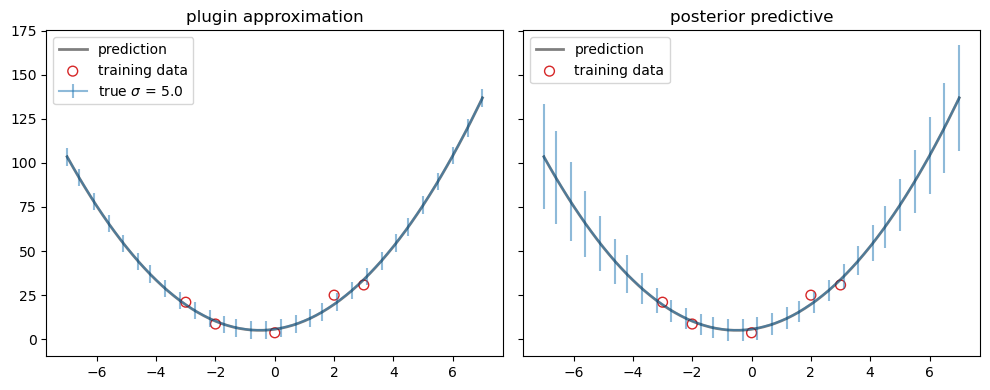

In [4]:
# mean (mode) of posterior predictive
hat_y = clf.predict(X_test)
errs = np.linspace(0, X_test.shape[0]-1, num=30, dtype=int)

# posterior predictive variance (eq. 11.122 and 11.124)
post_cov = σ2 * np.linalg.inv(X_train.T @ X_train + np.diag([σ2 / τ2] * X_train.shape[1]))
post_pred_var = np.sqrt(σ2 + np.sum((X_test @ post_cov) * X_test, axis=-1))

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,4))

axes[0].errorbar(X_test[errs, 1], hat_y[errs], yerr=σ, alpha=0.5, label=f'true $\sigma$ = {σ:.1f}')
axes[0].set_title('plugin approximation')

axes[1].errorbar(X_test[errs, 1], hat_y[errs], yerr=post_pred_var[errs], alpha=0.5)
axes[1].set_title('posterior predictive')

for ax in axes:
    ax.plot(X_test[:, 1], hat_y, color='k', lw=2, alpha=0.5, label='prediction')
    ax.scatter(X_train[:, 1], y_train, s=50, facecolors='none', edgecolors='tab:red', label='training data')
    ax.legend(loc='upper left')

fig.tight_layout()

#### Figure 11.21: (c) 10 samples from the plugin approximation to posterior predictive distribution. (d) 10 samples from the true posterior predictive distribution.

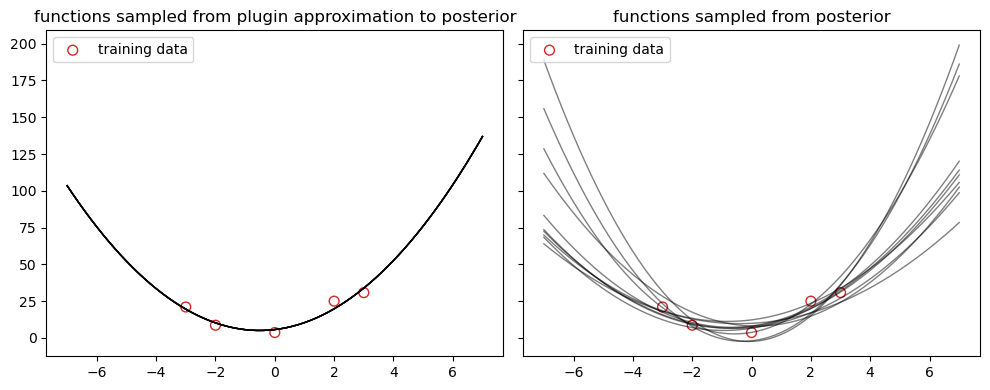

In [5]:
w_samples = rng.multivariate_normal(mean=clf.coef_, cov=post_cov, size=10)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,4))

for w in w_samples:
    axes[0].plot(X_test[:, 1], np.dot(X_test, clf.coef_), color='k', lw=1, alpha=0.5)
    axes[1].plot(X_test[:, 1], np.dot(X_test, w), color='k', lw=1, alpha=0.5)

axes[0].set_title('functions sampled from plugin approximation to posterior')
axes[1].set_title('functions sampled from posterior')

for ax in axes:
    ax.scatter(X_train[:, 1], y_train, s=50, facecolors='none', edgecolors='tab:red', label='training data')
    ax.legend(loc='upper left')

fig.tight_layout()